In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CipherCop/Android_Malware.csv", low_memory=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

threshold = 0.8 # You can adjust this threshold
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j, corr_matrix.iloc[i, j]))

# Sort by absolute correlation value
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Print the highly correlated pairs
print("Highly correlated features (absolute correlation >", threshold, "):")
for feature1, feature2, correlation in high_corr_pairs:
    print(f"- {feature1} and {feature2}: {correlation:.2f}")

Highly correlated features (absolute correlation > 0.8 ):
-  Avg Fwd Segment Size and  Fwd Packet Length Mean: 1.00
-  Fwd Header Length.1 and  Fwd Header Length: 1.00
- Subflow Fwd Packets and  Total Fwd Packets: 1.00
-  Subflow Fwd Bytes and Total Length of Fwd Packets: 1.00
-  Subflow Bwd Packets and  Total Backward Packets: 1.00
-  Subflow Bwd Bytes and  Total Length of Bwd Packets: 1.00
-  Fwd URG Flags and  Bwd PSH Flags: 1.00
-  RST Flag Count and  Bwd PSH Flags: 1.00
-  RST Flag Count and  Fwd URG Flags: 1.00
-  Avg Bwd Segment Size and  Bwd Packet Length Mean: 1.00
-  SYN Flag Count and  Bwd PSH Flags: 1.00
-  SYN Flag Count and  Fwd URG Flags: 1.00
-  RST Flag Count and  SYN Flag Count: 1.00
-  RST Flag Count and FIN Flag Count: 1.00
- FIN Flag Count and  Bwd PSH Flags: 1.00
- FIN Flag Count and  Fwd URG Flags: 1.00
-  SYN Flag Count and FIN Flag Count: 1.00
-  Subflow Bwd Packets and  Total Length of Bwd Packets: 1.00
-  Subflow Bwd Bytes and  Total Backward Packets: 1.00
- 

In [ ]:
correlated_groups = []

# Keep track of features already added to a group
processed_features = set()

# Iterate through the sorted high_corr_pairs
for feature1, feature2, correlation in high_corr_pairs:
    if feature1 not in processed_features and feature2 not in processed_features:
        # If neither feature is processed, create a new group
        correlated_groups.append({feature1, feature2})
        processed_features.add(feature1)
        processed_features.add(feature2)
    elif feature1 not in processed_features:
        # If only feature1 is not processed, add it to the group containing feature2
        for group in correlated_groups:
            if feature2 in group:
                group.add(feature1)
                processed_features.add(feature1)
                break
    elif feature2 not in processed_features:
        # If only feature2 is not processed, add it to the group containing feature1
        for group in correlated_groups:
            if feature1 in group:
                group.add(feature2)
                processed_features.add(feature2)
                break
    else:
        # If both features are already processed, check if they are in the same group
        # If not, merge the groups
        group1 = None
        group2 = None
        for group in correlated_groups:
            if feature1 in group:
                group1 = group
            if feature2 in group:
                group2 = group
            if group1 and group2:
                break
        if group1 and group2 and group1 != group2:
            correlated_groups.remove(group2)
            group1.update(group2)

# Print the identified groups
print("\nIdentified groups of highly correlated features:")
for i, group in enumerate(correlated_groups):
    print(f"Group {i+1}: {group}")


Identified groups of highly correlated features:
Group 1: {' Fwd Packet Length Std', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size'}
Group 2: {' Bwd Header Length', ' Fwd Header Length', ' Fwd Header Length.1'}
Group 3: {' Fwd Packet Length Max', 'FIN Flag Count', ' Bwd URG Flags', ' Total Backward Packets', ' Subflow Bwd Packets', ' RST Flag Count', 'Fwd PSH Flags', ' Total Fwd Packets', ' Subflow Bwd Bytes', ' SYN Flag Count', ' Total Length of Bwd Packets', ' Protocol', ' Bwd PSH Flags', 'Subflow Fwd Packets', ' Fwd URG Flags'}
Group 4: {' act_data_pkt_fwd', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes'}
Group 5: {' Packet Length Mean', ' Average Packet Size', ' Max Packet Length', ' Packet Length Std', ' Bwd Packet Length Mean', ' Avg Bwd Segment Size', ' Packet Length Variance', 'Bwd Packet Length Max'}
Group 6: {' Idle Max', 'Idle Mean', ' Idle Min'}
Group 7: {'Fwd Packets/s', ' Flow Packets/s'}
Group 8: {'Active Mean', ' Active Min', ' Active Max'}
Group 9: {' PSH Fla

In [ ]:
features_to_keep = []

# Iterate through the correlated groups
for group in correlated_groups:
    # For simplicity, keep the first feature in each group
    features_to_keep.append(list(group)[0])

# Add the non-numeric columns and any numeric columns not in any group
all_columns = set(df.columns)
numeric_columns = set(df.select_dtypes(include='number').columns)
non_numeric_columns = all_columns - numeric_columns
features_to_keep.extend(list(non_numeric_columns))

# Add any numeric columns that were not in any correlated group
all_grouped_features = set().union(*correlated_groups)
ungrouped_numeric_features = numeric_columns - all_grouped_features
features_to_keep.extend(list(ungrouped_numeric_features))


# Create a new DataFrame with the selected features
df_reduced = df[features_to_keep].copy()

# Display the first few rows of the new DataFrame and its shape
print("Reduced DataFrame:")
display(df_reduced.head())
print("\nShape of the reduced DataFrame:", df_reduced.shape)

Reduced DataFrame:


,Fwd Packet Length Std,Bwd Header Length,Fwd Packet Length Max,act_data_pkt_fwd,Packet Length Mean,Idle Max,Fwd Packets/s,Active Mean,PSH Flag Count,Fwd IAT Mean,...,Fwd IAT Std,Active Std,ECE Flag Count,Fwd Avg Bulk Rate,Bwd Packets/s,Fwd Packet Length Min,Flow Bytes/s,ACK Flag Count,Source Port,Fwd Avg Packets/Bulk
0,0.000000,32,0.0,0.0,0.000000,0.0,27.007319,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,27.007319,0.0,0.000000,1.0,50004,0.0
1,0.000000,32,0.0,0.0,0.000000,0.0,27.282896,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,27.282896,0.0,0.000000,1.0,35455,0.0
2,207.799311,244,581.0,3.0,615.952381,0.0,14.978496,0.0,1.0,6.876286e+04,...,6.237618e+04,0.0,0.0,0.0,22.467745,0.0,24218.356522,0.0,51775,0.0
3,0.000000,0,0.0,0.0,0.000000,0.0,322.268772,0.0,0.0,4.654500e+03,...,5.137131e+03,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,51775,0.0
4,99.538578,124,218.0,2.0,407.266667,0.0,0.402202,0.0,1.0,2.841499e+06,...,7.314093e+06,0.0,0.0,0.0,0.301652,0.0,307.131607,0.0,51776,0.0



Shape of the reduced DataFrame: (355630, 43)


In [ ]:
df_reduced.columns

Index([' Fwd Packet Length Std', ' Bwd Header Length',
       ' Fwd Packet Length Max', ' act_data_pkt_fwd', ' Packet Length Mean',
       ' Idle Max', 'Fwd Packets/s', 'Active Mean', ' PSH Flag Count',
       ' Fwd IAT Mean', 'Bwd IAT Total', ' Fwd IAT Max',
       ' Bwd Packet Length Std', ' Bwd IAT Mean', 'Label', ' CWE Flag Count',
       ' Source IP', 'Flow ID', 'Fwd Avg Bytes/Bulk', ' Destination IP',
       ' Down/Up Ratio', ' Timestamp', ' Flow IAT Std', 'Unnamed: 0',
       ' Destination Port', ' URG Flag Count', ' Bwd Packet Length Min',
       ' Init_Win_bytes_backward', ' Idle Std', ' Bwd Avg Packets/Bulk',
       ' Bwd Avg Bytes/Bulk', 'Bwd Avg Bulk Rate', ' min_seg_size_forward',
       ' Fwd IAT Std', ' Active Std', ' ECE Flag Count', ' Fwd Avg Bulk Rate',
       ' Bwd Packets/s', ' Fwd Packet Length Min', 'Flow Bytes/s',
       ' ACK Flag Count', ' Source Port', ' Fwd Avg Packets/Bulk'],
      dtype='object')

In [ ]:
df_reduced.fillna(0, inplace=True)
display(df_reduced.head())

,Fwd Packet Length Std,Bwd Header Length,Fwd Packet Length Max,act_data_pkt_fwd,Packet Length Mean,Idle Max,Fwd Packets/s,Active Mean,PSH Flag Count,Fwd IAT Mean,...,Fwd IAT Std,Active Std,ECE Flag Count,Fwd Avg Bulk Rate,Bwd Packets/s,Fwd Packet Length Min,Flow Bytes/s,ACK Flag Count,Source Port,Fwd Avg Packets/Bulk
0,0.000000,32,0.0,0.0,0.000000,0.0,27.007319,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,27.007319,0.0,0.000000,1.0,50004,0.0
1,0.000000,32,0.0,0.0,0.000000,0.0,27.282896,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,27.282896,0.0,0.000000,1.0,35455,0.0
2,207.799311,244,581.0,3.0,615.952381,0.0,14.978496,0.0,1.0,6.876286e+04,...,6.237618e+04,0.0,0.0,0.0,22.467745,0.0,24218.356522,0.0,51775,0.0
3,0.000000,0,0.0,0.0,0.000000,0.0,322.268772,0.0,0.0,4.654500e+03,...,5.137131e+03,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,51775,0.0
4,99.538578,124,218.0,2.0,407.266667,0.0,0.402202,0.0,1.0,2.841499e+06,...,7.314093e+06,0.0,0.0,0.0,0.301652,0.0,307.131607,0.0,51776,0.0


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Separate features and target
X = df_reduced.drop('Label', axis=1)
y = df_reduced['Label']

# Select only numeric columns for outlier detection
X_numeric = X.select_dtypes(include=np.number)

# Adjust contamination based on the expected proportion of outliers
iso_forest = IsolationForest(contamination='auto', random_state=42)
outliers = iso_forest.fit_predict(X_numeric)

# Filter out the outliers
df_reduced_cleaned = df_reduced[outliers == 1].copy()

print("Outliers removed using Isolation Forest.")
display(df_reduced_cleaned.head())
print("\nShape of the cleaned DataFrame:", df_reduced_cleaned.shape)

Outliers removed using Isolation Forest.


,Fwd Packet Length Std,Bwd Header Length,Fwd Packet Length Max,act_data_pkt_fwd,Packet Length Mean,Idle Max,Fwd Packets/s,Active Mean,PSH Flag Count,Fwd IAT Mean,...,Fwd IAT Std,Active Std,ECE Flag Count,Fwd Avg Bulk Rate,Bwd Packets/s,Fwd Packet Length Min,Flow Bytes/s,ACK Flag Count,Source Port,Fwd Avg Packets/Bulk
0,0.000000,32,0.0,0.0,0.000000,0.0,27.007319,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,27.007319,0.0,0.000000,1.0,50004,0.0
1,0.000000,32,0.0,0.0,0.000000,0.0,27.282896,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,27.282896,0.0,0.000000,1.0,35455,0.0
2,207.799311,244,581.0,3.0,615.952381,0.0,14.978496,0.0,1.0,6.876286e+04,...,6.237618e+04,0.0,0.0,0.0,22.467745,0.0,24218.356522,0.0,51775,0.0
3,0.000000,0,0.0,0.0,0.000000,0.0,322.268772,0.0,0.0,4.654500e+03,...,5.137131e+03,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,51775,0.0
4,99.538578,124,218.0,2.0,407.266667,0.0,0.402202,0.0,1.0,2.841499e+06,...,7.314093e+06,0.0,0.0,0.0,0.301652,0.0,307.131607,0.0,51776,0.0



Shape of the cleaned DataFrame: (338045, 43)


In [ ]:
df_reduced_cleaned.to_csv('/content/drive/MyDrive/CipherCop/android_cleaned_df.csv', index=False)

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/CipherCop/android_cleaned_df.csv", low_memory=False)

In [ ]:
df.dtypes

,0
Fwd Packet Length Std,float64
Bwd Header Length,int64
Fwd Packet Length Max,float64
act_data_pkt_fwd,float64
Packet Length Mean,float64
Idle Max,float64
Fwd Packets/s,float64
Active Mean,float64
PSH Flag Count,float64
Fwd IAT Mean,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

data = labelencoder(df)
data.dropna(axis=0, inplace=True)

# Find missing values
missing_values = data.isna().sum()
print(missing_values)

 Fwd Packet Length Std      0
 Bwd Header Length          0
 Fwd Packet Length Max      0
 act_data_pkt_fwd           0
 Packet Length Mean         0
 Idle Max                   0
Fwd Packets/s               0
Active Mean                 0
 PSH Flag Count             0
 Fwd IAT Mean               0
Bwd IAT Total               0
 Fwd IAT Max                0
 Bwd Packet Length Std      0
 Bwd IAT Mean               0
Label                       0
 CWE Flag Count             0
 Source IP                  0
Flow ID                     0
Fwd Avg Bytes/Bulk          0
 Destination IP             0
 Down/Up Ratio              0
 Timestamp                  0
 Flow IAT Std               0
Unnamed: 0                  0
 Destination Port           0
 URG Flag Count             0
 Bwd Packet Length Min      0
 Init_Win_bytes_backward    0
 Idle Std                   0
 Bwd Avg Packets/Bulk       0
 Bwd Avg Bytes/Bulk         0
Bwd Avg Bulk Rate           0
 min_seg_size_forward       0
 Fwd IAT S

In [ ]:
from sklearn.utils import resample

def balance_data(data, random_state=0):
    X = data.drop("Label", axis=1)
    y = data["Label"]
    class_counts = y.value_counts()
    minority_class_count = class_counts.min()
    balanced_data = pd.DataFrame(columns=data.columns)

    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)
        balanced_data = pd.concat([balanced_data, resampled_samples])

    balanced_data = balanced_data.sample(frac=1, random_state=random_state)

    return balanced_data

In [ ]:
balanced_data = balance_data(data)
balanced_class_counts = balanced_data["Label"].value_counts()
print(balanced_class_counts)

Label
3    22539
1    22539
0    22539
2    22539
Name: count, dtype: int64


/tmp/ipython-input-507299223.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, resampled_samples])


In [ ]:
X = data.drop(['Label'], axis=1) # Drop both original and encoded Label
y = data['Label']

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (338045, 42)
Shape of y: (338045,)


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,shuffle=True)

In [ ]:
print("Train features size : ",len(train_X))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_X))
print("Test features size : ",len(test_y))

Train features size :  270436
Train labels size :  270436
Test features size :  67609
Test features size :  67609


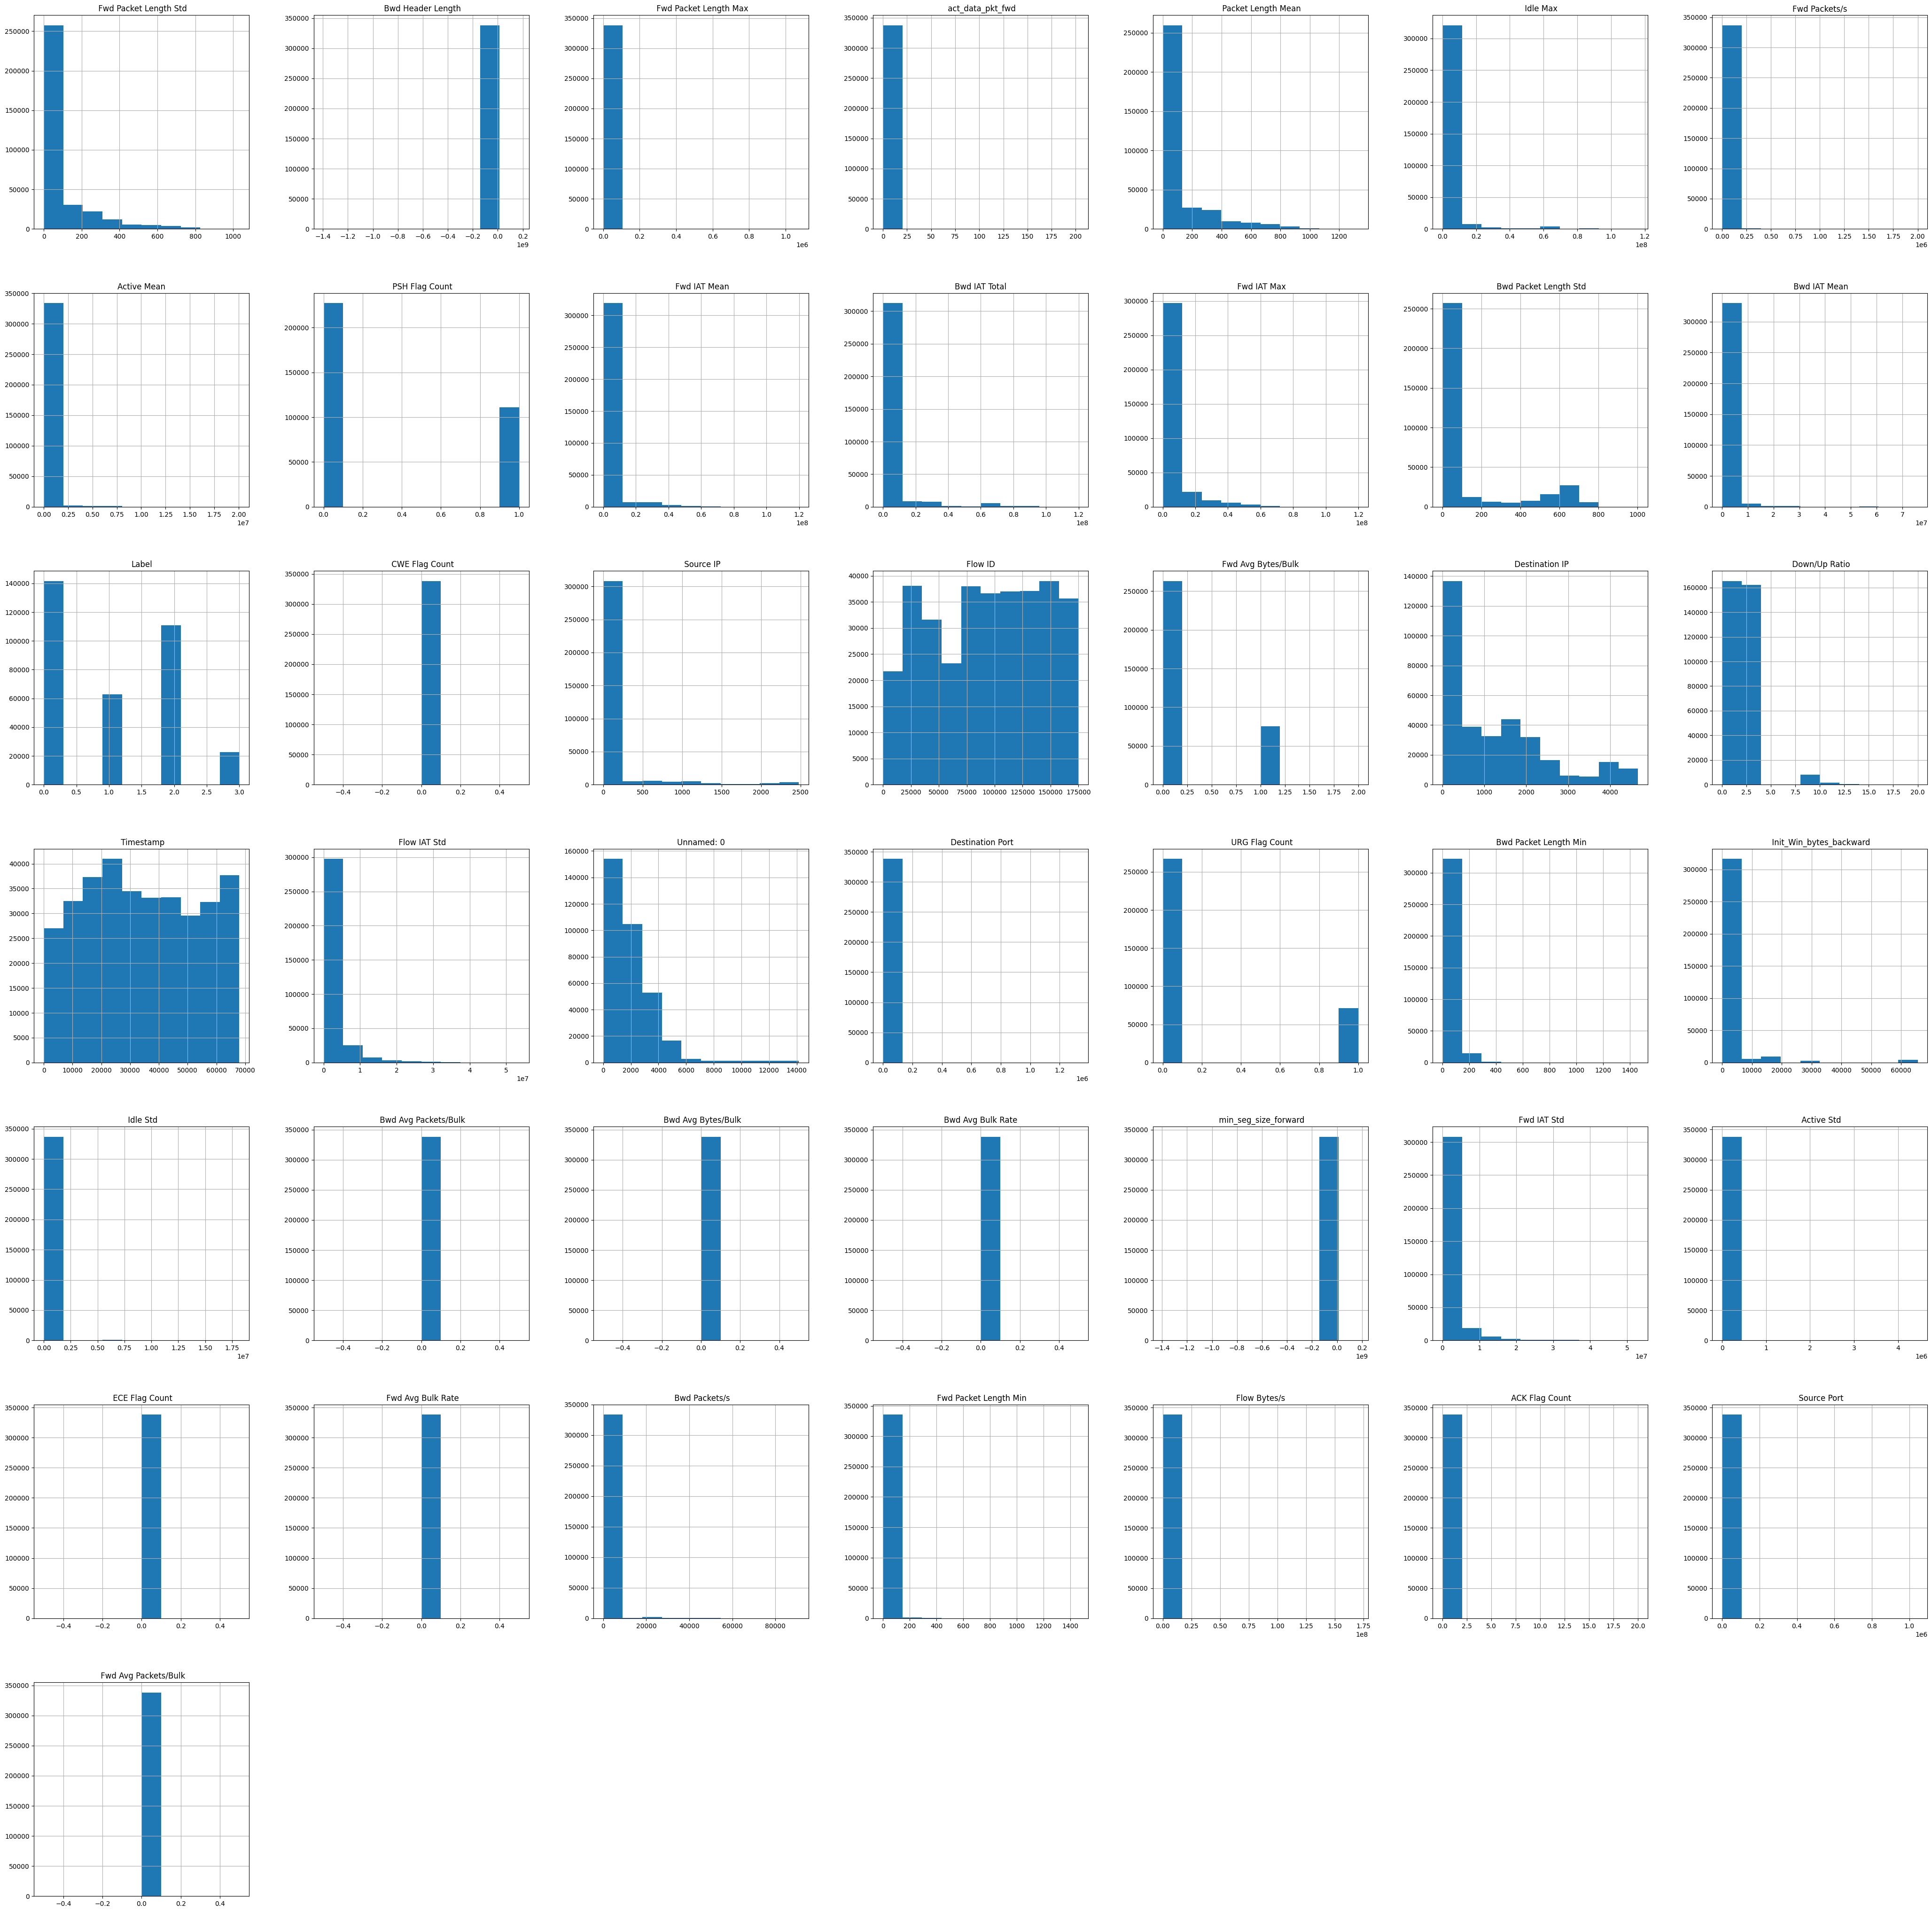

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(52,52))
plt.show()

Feature Importance:
 Timestamp: 0.5908727206856579
Fwd Avg Bytes/Bulk: 0.2600442927941705
Unnamed: 0: 0.03856386062600043
 Source IP: 0.017905318367540366
Flow ID: 0.016308845127302542
 Destination IP: 0.009854590960865732
 Down/Up Ratio: 0.007138110810466056
 Source Port: 0.006388864327103942
Fwd Packets/s: 0.005204146606806372
 Destination Port: 0.004332160300489868
 Bwd Packets/s: 0.0037008439914972234
 Fwd IAT Mean: 0.003570151510541178
 Fwd IAT Max: 0.003538254352725925
Flow Bytes/s: 0.002876530350315627
 Init_Win_bytes_backward: 0.002818527148561714
 Packet Length Mean: 0.0027179145888777123
 Bwd Packet Length Min: 0.0025814924517762196
 Flow IAT Std: 0.0024202928775930075
 Fwd Packet Length Max: 0.0022078838124609808
 Fwd IAT Std: 0.0019191013161872657
 Bwd Header Length: 0.0018906359688049532
Bwd IAT Total: 0.001695659229616404
 Fwd Packet Length Std: 0.0016189086023966016
 min_seg_size_forward: 0.0015542830264343908
 Bwd Packet Length Std: 0.0015425684925743652
 Bwd IAT Mean: 

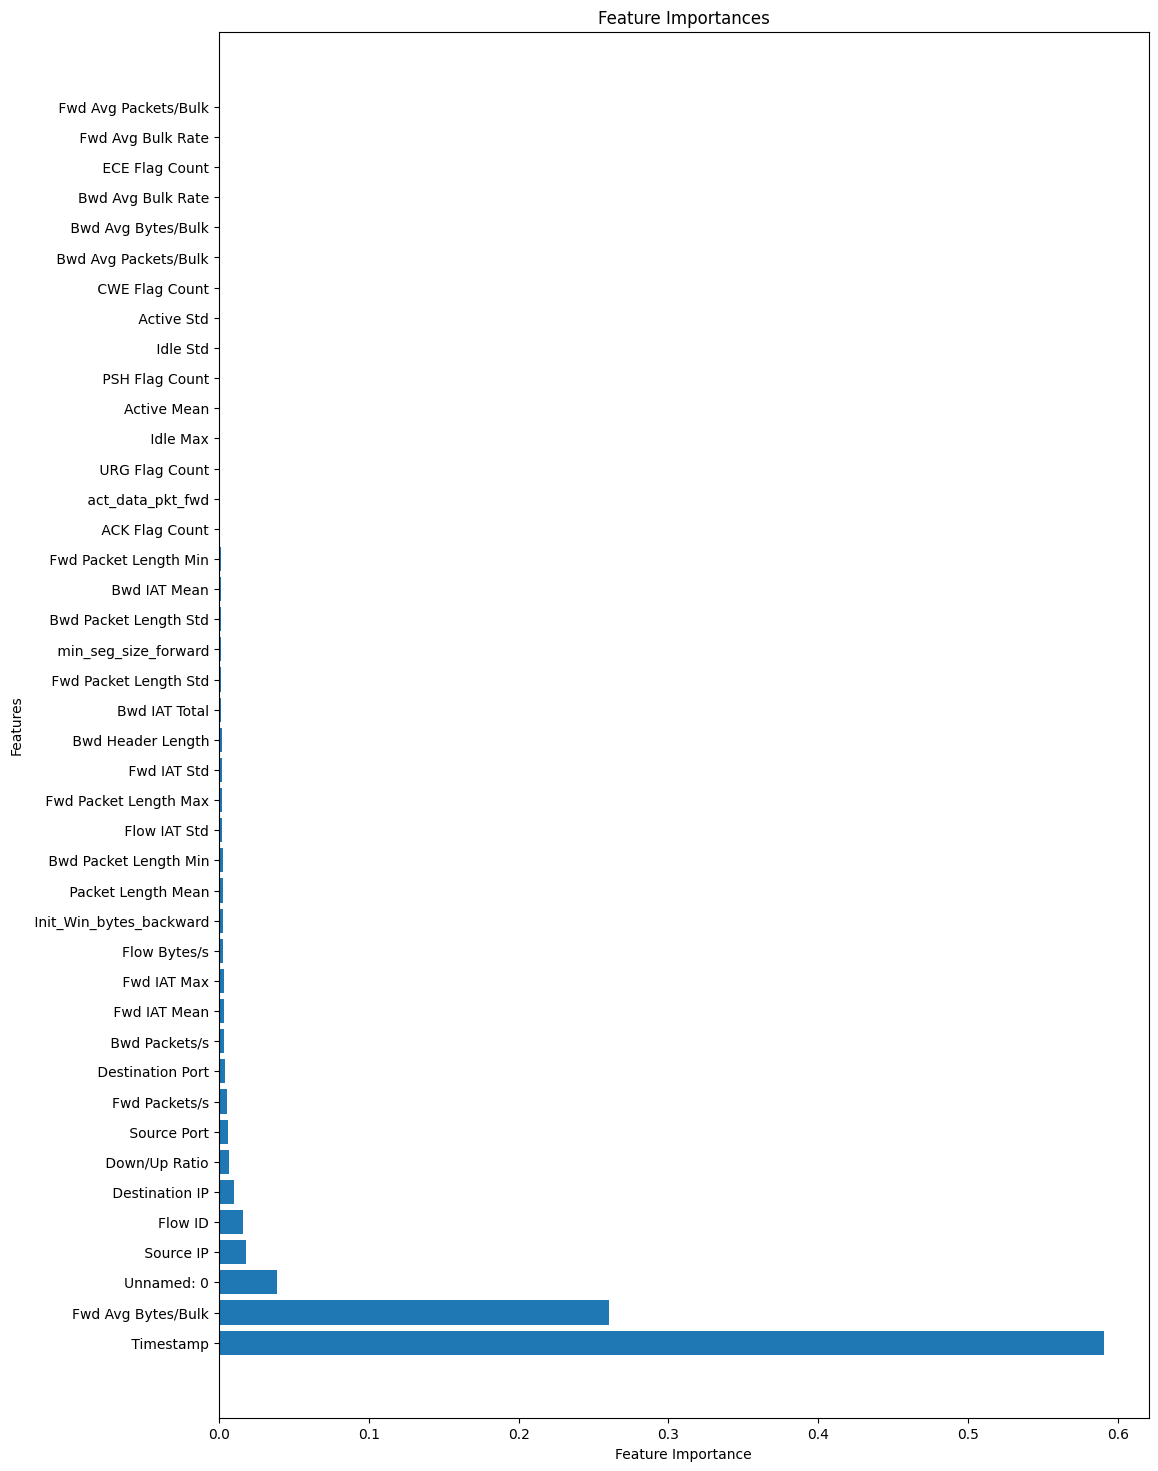

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(train_X, train_y)
feature_importance = random_forest_model.feature_importances_
feature_importance_dict = dict(zip(train_X.columns, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

features, importance = zip(*sorted_feature_importance)
plt.figure(figsize=(12, 18))
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


Gradient Boosting Model:


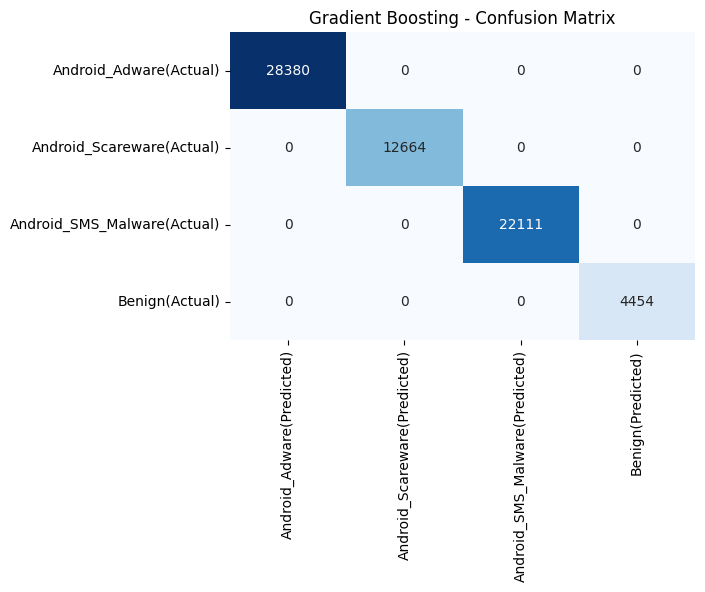

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28380
           1       1.00      1.00      1.00     12664
           2       1.00      1.00      1.00     22111
           3       1.00      1.00      1.00      4454

    accuracy                           1.00     67609
   macro avg       1.00      1.00      1.00     67609
weighted avg       1.00      1.00      1.00     67609


Random Forest Model:


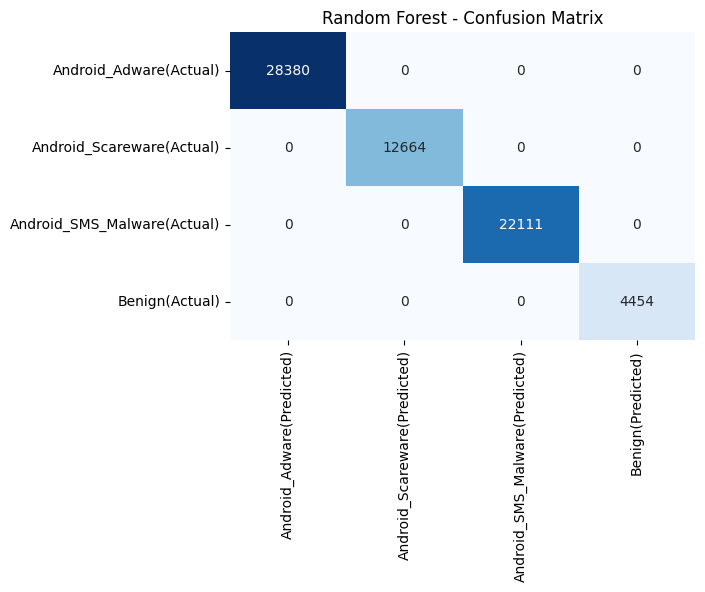

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28380
           1       1.00      1.00      1.00     12664
           2       1.00      1.00      1.00     22111
           3       1.00      1.00      1.00      4454

    accuracy                           1.00     67609
   macro avg       1.00      1.00      1.00     67609
weighted avg       1.00      1.00      1.00     67609


AdaBoost Model:


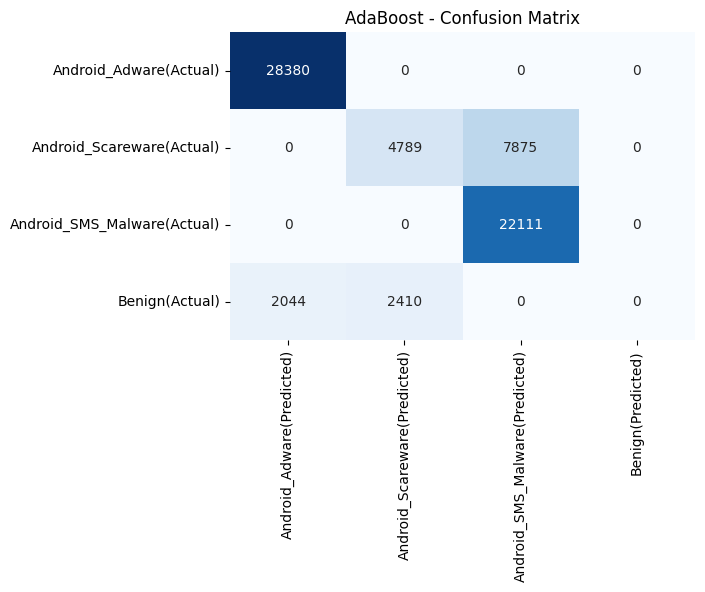

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     28380
           1       0.67      0.38      0.48     12664
           2       0.74      1.00      0.85     22111
           3       0.00      0.00      0.00      4454

    accuracy                           0.82     67609
   macro avg       0.58      0.59      0.57     67609
weighted avg       0.76      0.82      0.77     67609


Decision Tree Model:


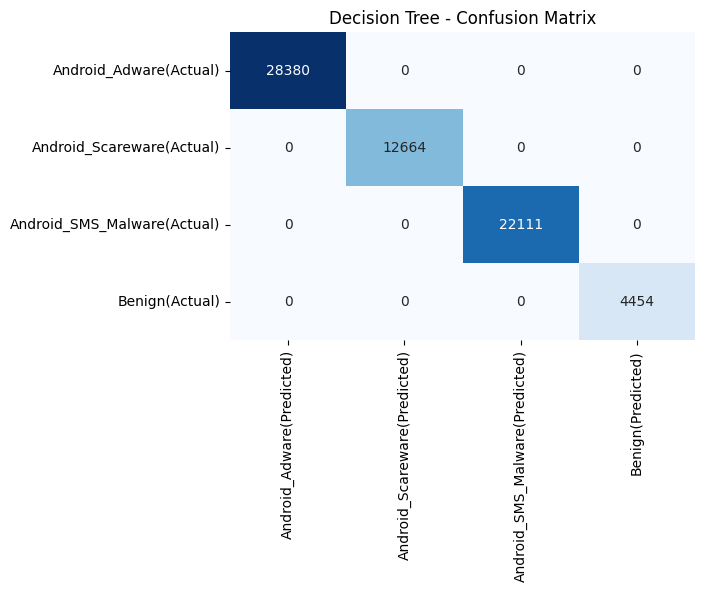

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28380
           1       1.00      1.00      1.00     12664
           2       1.00      1.00      1.00     22111
           3       1.00      1.00      1.00      4454

    accuracy                           1.00     67609
   macro avg       1.00      1.00      1.00     67609
weighted avg       1.00      1.00      1.00     67609


Multi-layer Perceptron Model:


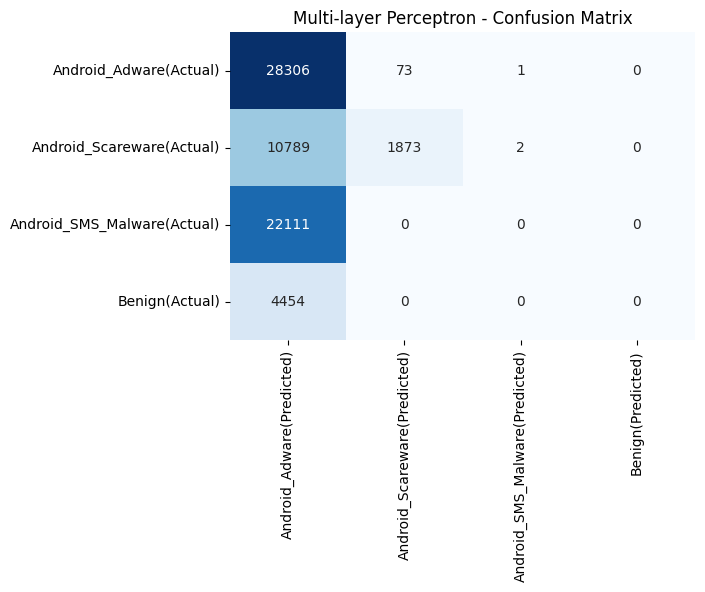

Multi-layer Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60     28380
           1       0.96      0.15      0.26     12664
           2       0.00      0.00      0.00     22111
           3       0.00      0.00      0.00      4454

    accuracy                           0.45     67609
   macro avg       0.35      0.29      0.21     67609
weighted avg       0.36      0.45      0.30     67609


Logistic Regression Model:


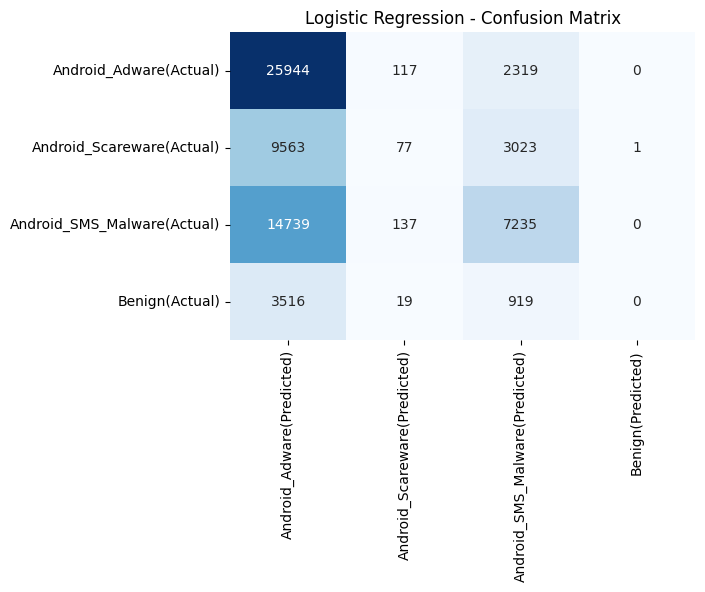

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.91      0.63     28380
           1       0.22      0.01      0.01     12664
           2       0.54      0.33      0.41     22111
           3       0.00      0.00      0.00      4454

    accuracy                           0.49     67609
   macro avg       0.31      0.31      0.26     67609
weighted avg       0.42      0.49      0.40     67609


K-Nearest Neighbors Model:


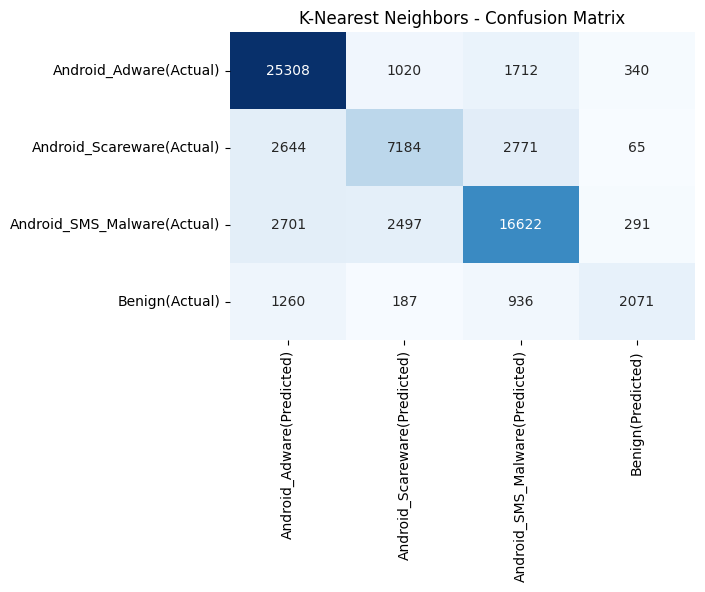

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84     28380
           1       0.66      0.57      0.61     12664
           2       0.75      0.75      0.75     22111
           3       0.75      0.46      0.57      4454

    accuracy                           0.76     67609
   macro avg       0.74      0.67      0.69     67609
weighted avg       0.75      0.76      0.75     67609


Naive Bayes (Gaussian) Model:


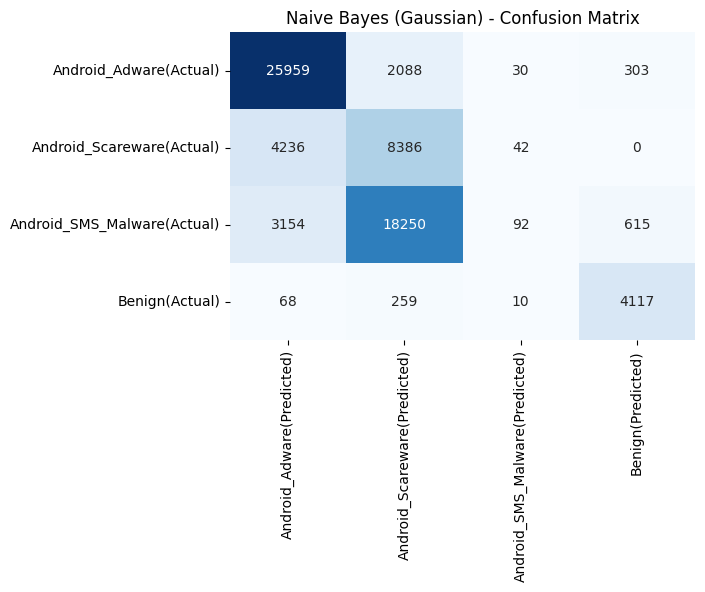

Naive Bayes (Gaussian) Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84     28380
           1       0.29      0.66      0.40     12664
           2       0.53      0.00      0.01     22111
           3       0.82      0.92      0.87      4454

    accuracy                           0.57     67609
   macro avg       0.60      0.63      0.53     67609
weighted avg       0.61      0.57      0.49     67609



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Multi-layer Perceptron': MLPClassifier(random_state=42),
    # 'Bagging Classifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes (Gaussian)': GaussianNB(),
}

for model_name, model in models.items():
    print(f"\n{model_name} Model:")
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    cm = confusion_matrix(test_y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Android_Adware(Predicted)', 'Android_Scareware(Predicted)','Android_SMS_Malware(Predicted)', 'Benign(Predicted)'], yticklabels=['Android_Adware(Actual)', 'Android_Scareware(Actual)','Android_SMS_Malware(Actual)', 'Benign(Actual)'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    classification_rep = classification_report(test_y, y_pred)
    print(f"{model_name} Classification Report:\n", classification_rep)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import lightgbm as lgb
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_y_true, all_y_pred = [], []
classes=4
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n===== Fold {fold} =====")
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = lgb.LGBMClassifier(
        objective='multiclass',
        num_class=classes,
        metric='multi_logloss',
        learning_rate=0.05,
        n_estimators=200,
        max_depth=7,
        random_state=42
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='multi_logloss',
        callbacks=[lgb.log_evaluation(period=20)],

    )

    preds = model.predict(X_val)
    all_y_true.extend(y_val)
    all_y_pred.extend(preds)

    acc = accuracy_score(y_val, preds)
    print(f"Fold {fold} Accuracy: {acc:.4f}")



===== Fold 1 =====


KeyError: "None of [Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,\n            9,\n       ...\n       338033, 338034, 338036, 338037, 338038, 338039, 338040, 338041, 338043,\n       338044],\n      dtype='int64', length=270436)] are in the [columns]"